In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_parquet(r"C:\Users\DELL 5502\OneDrive\Desktop\imarticus\yellow_tripdata_2023-11.parquet")

In [3]:
df.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-11-01 00:03:03,2023-11-01 01:04:08,2.0,13.60,1.0,N,132,26,2,61.8,2.75,0.5,0.00,0.00,1.0,66.05,0.0,1.75
1,1,2023-11-01 00:03:28,2023-11-01 00:23:59,0.0,3.50,1.0,N,140,7,1,20.5,3.50,0.5,5.10,0.00,1.0,30.60,2.5,0.00
2,2,2023-10-31 23:58:05,2023-11-01 00:54:03,4.0,18.61,2.0,N,132,230,1,70.0,0.00,0.5,16.54,6.94,1.0,99.23,2.5,1.75
3,2,2023-11-01 00:03:50,2023-11-01 00:04:59,1.0,0.39,1.0,N,236,236,1,4.4,1.00,0.5,1.88,0.00,1.0,11.28,2.5,0.00
4,2,2023-11-01 00:06:30,2023-11-01 00:14:25,1.0,1.20,1.0,N,236,141,1,10.0,1.00,0.5,3.00,0.00,1.0,18.00,2.5,0.00
5,2,2023-11-01 00:17:18,2023-11-01 00:23:39,3.0,0.60,1.0,N,141,263,1,7.9,1.00,0.5,2.58,0.00,1.0,15.48,2.5,0.00
6,2,2023-11-01 00:14:49,2023-11-01 00:39:44,1.0,5.44,1.0,N,114,62,2,28.2,1.00,0.5,0.00,0.00,1.0,33.20,2.5,0.00
7,1,2023-11-01 00:07:29,2023-11-01 00:11:01,2.0,0.90,1.0,N,48,246,1,6.5,3.50,0.5,2.30,0.00,1.0,13.80,2.5,0.00
8,2,2023-11-01 00:39:20,2023-11-01 01:00:24,1.0,6.20,1.0,N,170,42,1,27.5,1.00,0.5,8.12,0.00,1.0,40.62,2.5,0.00
9,1,2023-11-01 00:21:12,2023-11-01 00:26:45,2.0,0.40,1.0,N,144,148,2,5.8,3.50,0.5,0.00,0.00,1.0,10.80,2.5,0.00


In [51]:
df.shape

(3207040, 17)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3207040 entries, 0 to 3207039
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   payment_type           int64         
 6   fare_amount            float64       
 7   extra                  float64       
 8   mta_tax                float64       
 9   tip_amount             float64       
 10  tolls_amount           float64       
 11  improvement_surcharge  float64       
 12  total_amount           float64       
 13  congestion_surcharge   float64       
 14  Airport_fee            float64       
 15  pickup_hour            int64         
 16  pickup_dayofweek       int64         
dtypes: datetime64[ns](2), float64(11), int32(1), int64(3)
memory usag

In [6]:
df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          132675
trip_distance                 0
RatecodeID               132675
store_and_fwd_flag       132675
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     132675
Airport_fee              132675
dtype: int64

In [7]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [8]:
df["VendorID"].nunique()#total unique values

3

In [9]:
df["VendorID"].unique()#all unique category

array([1, 2, 6])

In [10]:
df["VendorID"].value_counts()

2    2487817
1     851444
6        454
Name: VendorID, dtype: int64

<Axes: >

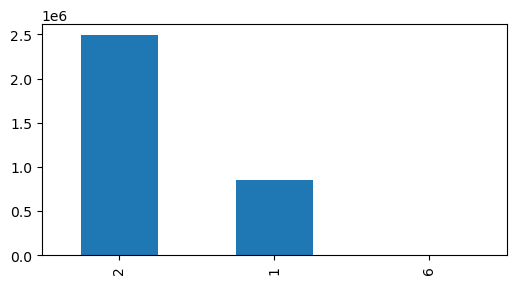

In [11]:
df["VendorID"].value_counts().plot(kind="bar", figsize=(6,3))

In [12]:
df["passenger_count"].nunique()

10

In [13]:
df["passenger_count"].unique()

array([ 2.,  0.,  4.,  1.,  3.,  5.,  6.,  8.,  7.,  9., nan])

In [14]:
df["passenger_count"].value_counts()

1.0    2438039
2.0     484579
3.0     113651
4.0      64725
0.0      41443
5.0      39579
6.0      24969
8.0         42
7.0          9
9.0          4
Name: passenger_count, dtype: int64

In [15]:
df["RatecodeID"].nunique()

7

In [16]:
df["RatecodeID"].unique()

array([ 1.,  2., 99.,  5.,  4.,  3.,  6., nan])

In [17]:
df["RatecodeID"].value_counts()

1.0     3025815
2.0      121449
99.0      21342
5.0       20966
3.0       10695
4.0        6767
6.0           6
Name: RatecodeID, dtype: int64

In [18]:
df["store_and_fwd_flag"].nunique()

2

In [19]:
df["store_and_fwd_flag"].unique()

array(['N', 'Y', None], dtype=object)

In [20]:
df["store_and_fwd_flag"].value_counts()

N    3192960
Y      14080
Name: store_and_fwd_flag, dtype: int64

In [21]:
df["payment_type"].nunique()

5

In [22]:
df["payment_type"].unique()

array([2, 1, 3, 4, 0], dtype=int64)

In [23]:
df["payment_type"].value_counts()

1    2630182
2     507418
0     132675
4      48425
3      21015
Name: payment_type, dtype: int64

In [24]:
df["mta_tax"].nunique()

8

In [25]:
df["mta_tax"].unique()

array([ 0.5 , -0.5 ,  0.  ,  4.  ,  3.5 ,  0.8 ,  0.05,  2.  ])

In [26]:
df["mta_tax"].value_counts()

 0.50    3269715
-0.50      35600
 0.00      34394
 3.50          2
 4.00          1
 0.80          1
 0.05          1
 2.00          1
Name: mta_tax, dtype: int64

In [27]:
df["improvement_surcharge"].nunique()

4

In [28]:
df["improvement_surcharge"].unique()

array([ 1. , -1. ,  0. ,  0.3])

In [29]:
df["improvement_surcharge"].value_counts()

 1.0    3300737
-1.0      36725
 0.0       1501
 0.3        752
Name: improvement_surcharge, dtype: int64

In [30]:
df["congestion_surcharge"].nunique()

5

In [31]:
df["congestion_surcharge"].unique()

array([ 0.  ,  2.5 , -2.5 ,  0.75,  0.5 ,   nan])

In [32]:
df["Airport_fee"].nunique()

3

In [33]:
df["Airport_fee"].unique()

array([ 1.75,  0.  , -1.75,   nan])

In [34]:
df["Airport_fee"].value_counts()

 0.00    2924365
 1.75     277872
-1.75       4803
Name: Airport_fee, dtype: int64

In [35]:
df.drop(columns=["store_and_fwd_flag"],inplace=True)

In [36]:
df.shape

(3339715, 18)

In [37]:
df.drop(columns=['PULocationID'],inplace=True)

In [38]:
df.drop(columns=["DOLocationID"],inplace=True)

In [39]:
df.drop(columns=["RatecodeID"],inplace=True)

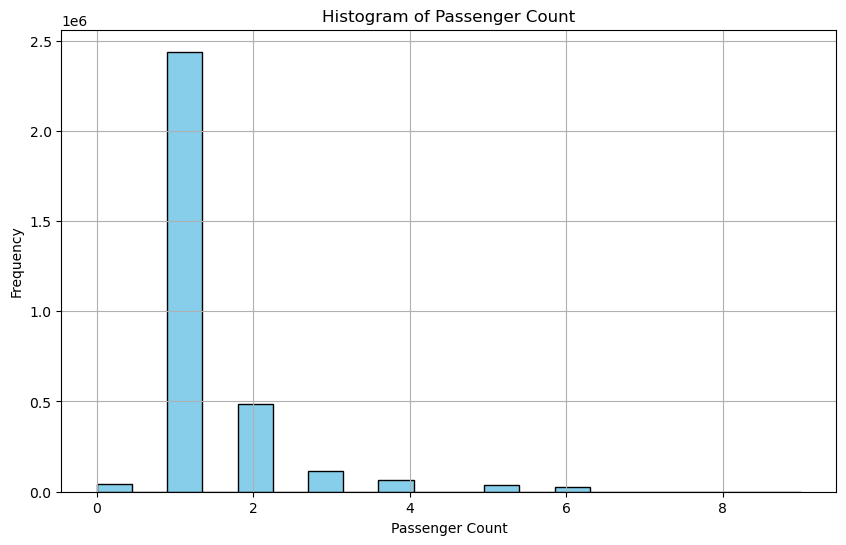

In [40]:
plt.figure(figsize=(10,6))
plt.hist(df["passenger_count"],bins=20,color='skyblue', edgecolor='black')
plt.title('Histogram of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [41]:
df.dropna(inplace=True)

In [42]:
df.shape

(3207040, 15)

In [43]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

In [44]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee'],
      dtype='object')

In [45]:
#datetime features

In [46]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

In [47]:
df["fare_amount"].value_counts()

 9.30      138353
 8.60      137799
 10.00     137232
 7.90      133266
 10.70     131236
            ...  
 31.91          1
 18.51          1
 166.94         1
 16.96          1
-180.00         1
Name: fare_amount, Length: 3068, dtype: int64

In [48]:
(df['fare_amount'] == 0).sum()

1041

In [49]:
(df['trip_distance'] == 0).sum()

40646

In [101]:
(df['average_speed'] == 0).sum()

1

In [53]:
df['fare_amount'] = df['fare_amount'].replace(0, df['fare_amount'].mean())
df['trip_distance'] = df['trip_distance'].replace(0, df['trip_distance'].mean())

In [54]:
(df['fare_amount'] == 0).sum()

0

In [55]:
(df['trip_distance'] == 0).sum()

0

In [56]:
#feature: Cost per unit distance
df['cost_per_unit_distance'] = df['fare_amount'] / df['trip_distance']

In [57]:
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds()

In [58]:
(df['trip_duration'] == 0).sum()

938

In [59]:
df['trip_duration'] = df['trip_duration'].replace(0, df['trip_duration'].mean())

In [60]:
(df['trip_duration'] == 0).sum()

0

In [61]:
#average speed (in miles per hour)
df['average_speed'] = df['trip_distance'] / (df['trip_duration'] / 3600)  # Convert trip duration to hours


In [62]:
df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)
df.drop(['pickup_datetime', 'dropoff_datetime'], axis=1, inplace=True)

In [63]:
df.head(10)

,VendorID,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour,pickup_dayofweek,cost_per_unit_distance,trip_duration,average_speed
0,1,2.0,13.60,2,61.8,2.75,0.5,0.00,0.00,1.0,66.05,0.0,1.75,0,2,4.544118,3665.0,13.358799
1,1,0.0,3.50,1,20.5,3.50,0.5,5.10,0.00,1.0,30.60,2.5,0.00,0,2,5.857143,1231.0,10.235581
2,2,4.0,18.61,1,70.0,0.00,0.5,16.54,6.94,1.0,99.23,2.5,1.75,23,1,3.761419,3358.0,19.951161
3,2,1.0,0.39,1,4.4,1.00,0.5,1.88,0.00,1.0,11.28,2.5,0.00,0,2,11.282051,69.0,20.347826
4,2,1.0,1.20,1,10.0,1.00,0.5,3.00,0.00,1.0,18.00,2.5,0.00,0,2,8.333333,475.0,9.094737
5,2,3.0,0.60,1,7.9,1.00,0.5,2.58,0.00,1.0,15.48,2.5,0.00,0,2,13.166667,381.0,5.669291
6,2,1.0,5.44,2,28.2,1.00,0.5,0.00,0.00,1.0,33.20,2.5,0.00,0,2,5.183824,1495.0,13.099666
7,1,2.0,0.90,1,6.5,3.50,0.5,2.30,0.00,1.0,13.80,2.5,0.00,0,2,7.222222,212.0,15.283019
8,2,1.0,6.20,1,27.5,1.00,0.5,8.12,0.00,1.0,40.62,2.5,0.00,0,2,4.435484,1264.0,17.658228
9,1,2.0,0.40,2,5.8,3.50,0.5,0.00,0.00,1.0,10.80,2.5,0.00,0,2,14.500000,333.0,4.324324


In [64]:
df["pickup_dayofweek"].nunique()

7

In [65]:
df["pickup_dayofweek"].unique()

array([2, 1, 3, 4, 5, 6, 0], dtype=int64)

In [66]:
df["pickup_dayofweek"].value_counts()

2    559359
3    554174
5    445101
1    443854
4    432792
0    389239
6    382521
Name: pickup_dayofweek, dtype: int64

In [67]:
df["pickup_hour"].nunique()

24

In [68]:
df["pickup_hour"].unique()

array([ 0, 23,  1, 21, 22, 20, 14, 15,  2, 19,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 16, 17, 18], dtype=int64)

In [69]:
df["pickup_hour"].value_counts()

18    230289
17    220591
15    204964
19    204115
16    204000
14    196029
21    187575
20    185323
13    181322
12    174138
22    170391
11    161319
10    148803
9     135844
23    126198
8     118874
7      86574
0      80836
1      55907
6      42049
2      34548
3      23083
5      18233
4      16035
Name: pickup_hour, dtype: int64

In [70]:
#correlation matrix
correlation_matrix = df.corr()

In [71]:
correlation_matrix

,VendorID,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour,pickup_dayofweek,cost_per_unit_distance,trip_duration,average_speed
VendorID,1.000000,0.093010,0.013550,0.017151,0.020221,-0.540427,-0.057458,0.040495,0.017819,-0.059303,0.025560,-0.008665,0.036231,0.017908,0.017707,0.009256,0.008642,0.013160
passenger_count,0.093010,1.000000,0.020322,0.016850,0.039943,-0.049424,-0.010950,0.014253,0.029781,0.001319,0.037446,0.009580,0.017424,0.020899,0.062995,0.004263,0.024054,0.005867
trip_distance,0.013550,0.020322,1.000000,-0.001915,0.493264,0.111173,-0.038345,0.335111,0.376755,0.001890,0.494925,-0.144837,0.372667,-0.004245,0.003857,-0.015373,0.157506,0.051523
payment_type,0.017151,0.016850,-0.001915,1.000000,-0.103630,-0.086988,-0.402039,-0.368284,-0.037708,-0.439255,-0.172225,-0.325864,-0.009447,-0.024243,0.007513,0.000958,-0.009403,0.080703
fare_amount,0.020221,0.039943,0.493264,-0.103630,1.000000,0.194844,0.069746,0.602218,0.626589,0.226754,0.979628,-0.125227,0.582663,0.001492,-0.008515,0.090651,0.267758,0.070543
extra,-0.540427,-0.049424,0.111173,-0.086988,0.194844,1.000000,0.152858,0.220469,0.274921,0.145049,0.280037,0.057616,0.366218,0.177941,-0.117072,-0.006386,0.051911,-0.028943
mta_tax,-0.057458,-0.010950,-0.038345,-0.402039,0.069746,0.152858,1.000000,0.011279,-0.083073,0.902374,0.094197,0.624370,0.066428,0.015991,-0.008492,0.013341,0.003846,-0.162747
tip_amount,0.040495,0.014253,0.335111,-0.368284,0.602218,0.220469,0.011279,1.000000,0.488698,0.093831,0.720540,-0.029462,0.416144,0.032297,-0.014894,0.018175,0.169797,0.036608
tolls_amount,0.017819,0.029781,0.376755,-0.037708,0.626589,0.274921,-0.083073,0.488698,1.000000,0.055044,0.701356,-0.102660,0.490353,-0.015268,-0.007009,-0.000081,0.168354,0.006531
improvement_surcharge,-0.059303,0.001319,0.001890,-0.439255,0.226754,0.145049,0.902374,0.093831,0.055044,1.000000,0.244868,0.586543,0.081691,0.006481,-0.004350,0.064136,0.012287,-0.065002


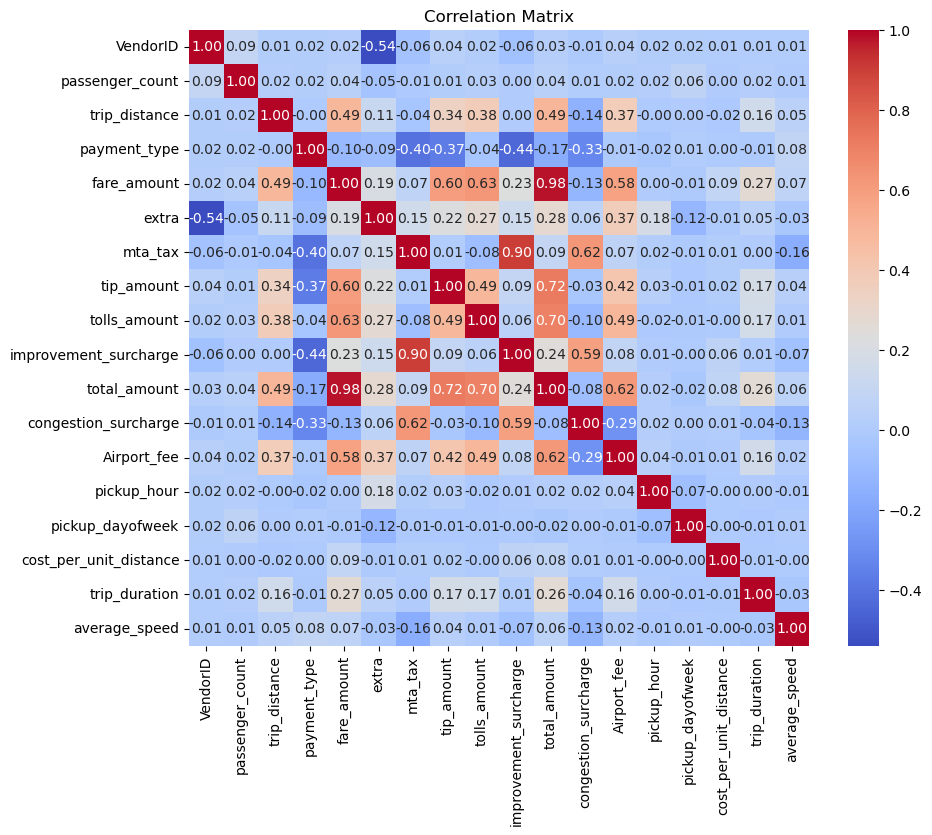

In [72]:
#correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [73]:
np.isinf(df).sum()

VendorID                  0
passenger_count           0
trip_distance             0
payment_type              0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
congestion_surcharge      0
Airport_fee               0
pickup_hour               0
pickup_dayofweek          0
cost_per_unit_distance    0
trip_duration             0
average_speed             0
dtype: int64

In [74]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee', 'pickup_hour', 'pickup_dayofweek',
       'cost_per_unit_distance', 'trip_duration', 'average_speed'],
      dtype='object')

In [75]:
from sklearn.preprocessing import MinMaxScaler

#the numerical features
numerical_features = ['trip_distance', 'cost_per_unit_distance','average_speed',]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical features between 0 and 1
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [76]:
df.isna().sum()

VendorID                  0
passenger_count           0
trip_distance             0
payment_type              0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
congestion_surcharge      0
Airport_fee               0
pickup_hour               0
pickup_dayofweek          0
cost_per_unit_distance    0
trip_duration             0
average_speed             0
dtype: int64

In [77]:
from sklearn.impute import SimpleImputer

#Initialize SimpleImputer with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

#Impute missing values in 'cost_per_unit_distance' column
df['cost_per_unit_distance'] = imputer.fit_transform(df[['cost_per_unit_distance']])

In [78]:
np.isinf(df).sum()

VendorID                  0
passenger_count           0
trip_distance             0
payment_type              0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
congestion_surcharge      0
Airport_fee               0
pickup_hour               0
pickup_dayofweek          0
cost_per_unit_distance    0
trip_duration             0
average_speed             0
dtype: int64

In [79]:
df.head(30)

,VendorID,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour,pickup_dayofweek,cost_per_unit_distance,trip_duration,average_speed
0,1,2.0,0.001724,2,61.8,2.75,0.5,0.00,0.00,1.0,66.05,0.0,1.75,0,2,0.343423,3665.0,0.041888
1,1,0.0,0.000443,1,20.5,3.50,0.5,5.10,0.00,1.0,30.60,2.5,0.00,0,2,0.343453,1231.0,0.041836
2,2,4.0,0.002360,1,70.0,0.00,0.5,16.54,6.94,1.0,99.23,2.5,1.75,23,1,0.343405,3358.0,0.041997
3,2,1.0,0.000048,1,4.4,1.00,0.5,1.88,0.00,1.0,11.28,2.5,0.00,0,2,0.343578,69.0,0.042003
4,2,1.0,0.000151,1,10.0,1.00,0.5,3.00,0.00,1.0,18.00,2.5,0.00,0,2,0.343510,475.0,0.041817
5,2,3.0,0.000075,1,7.9,1.00,0.5,2.58,0.00,1.0,15.48,2.5,0.00,0,2,0.343621,381.0,0.041760
6,2,1.0,0.000689,2,28.2,1.00,0.5,0.00,0.00,1.0,33.20,2.5,0.00,0,2,0.343437,1495.0,0.041883
7,1,2.0,0.000113,1,6.5,3.50,0.5,2.30,0.00,1.0,13.80,2.5,0.00,0,2,0.343484,212.0,0.041919
8,2,1.0,0.000785,1,27.5,1.00,0.5,8.12,0.00,1.0,40.62,2.5,0.00,0,2,0.343420,1264.0,0.041959
9,1,2.0,0.000049,2,5.8,3.50,0.5,0.00,0.00,1.0,10.80,2.5,0.00,0,2,0.343652,333.0,0.041738


In [80]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee', 'pickup_hour', 'pickup_dayofweek',
       'cost_per_unit_distance', 'trip_duration', 'average_speed'],
      dtype='object')

In [ ]:
# Split the data into training and testing sets add validation test too##

In [81]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee', 'pickup_hour', 'pickup_dayofweek',
       'cost_per_unit_distance', 'trip_duration', 'average_speed'],
      dtype='object')

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df[['VendorID', 'passenger_count', 'trip_distance', 'payment_type',
        'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
        'improvement_surcharge', 'pickup_hour', 'pickup_dayofweek',
        'cost_per_unit_distance', 'trip_duration', 'average_speed']]
y = df['fare_amount']

# Split the data into training (70%), validation (10%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_regressor.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)

# Predict on the testing set
y_test_pred = rf_regressor.predict(X_test)

# Evaluate the model on the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Testing Mean Squared Error:", mse_test)
print("Testing Mean Absolute Error:", mae_test)

Validation Mean Squared Error: 5.178988376723715
Validation Mean Absolute Error: 0.05429143019165057
Testing Mean Squared Error: 1.1314125724834272
Testing Mean Absolute Error: 0.047529072765142205


In [ ]:
# Validation Mean Squared Error: 5.14872142353684
# Validation Mean Absolute Error: 0.052813032225339215
# Testing Mean Squared Error: 1.0944647634050018
# Testing Mean Absolute Error: 0.04657202724299188

In [83]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [84]:
import joblib

# Save the trained model to a file
joblib.dump(rf_regressor, 'random_forest_yellowtaxi_model.pkl')

['random_forest_yellowtaxi_model.pkl']

In [85]:
loaded_yellowtaxi_model = joblib.load('random_forest_yellowtaxi_model.pkl')

In [86]:
#predicting_new_data

In [87]:
df_subset = df.head(10000)

In [88]:
#saving the subset to new data
df_subset.to_csv('subset_data.csv', index=False)

In [89]:
df_subset.head()

,VendorID,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour,pickup_dayofweek,cost_per_unit_distance,trip_duration,average_speed
0,1,2.0,0.001724,2,61.8,2.75,0.5,0.00,0.00,1.0,66.05,0.0,1.75,0,2,0.343423,3665.0,0.041888
1,1,0.0,0.000443,1,20.5,3.50,0.5,5.10,0.00,1.0,30.60,2.5,0.00,0,2,0.343453,1231.0,0.041836
2,2,4.0,0.002360,1,70.0,0.00,0.5,16.54,6.94,1.0,99.23,2.5,1.75,23,1,0.343405,3358.0,0.041997
3,2,1.0,0.000048,1,4.4,1.00,0.5,1.88,0.00,1.0,11.28,2.5,0.00,0,2,0.343578,69.0,0.042003
4,2,1.0,0.000151,1,10.0,1.00,0.5,3.00,0.00,1.0,18.00,2.5,0.00,0,2,0.343510,475.0,0.041817


In [90]:
df_subset["fare_amount"]=float('nan')

C:\Users\DELL 5502\AppData\Local\Temp\ipykernel_21384\490801483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["fare_amount"]=float('nan')


In [91]:
df_subset.head()

,VendorID,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour,pickup_dayofweek,cost_per_unit_distance,trip_duration,average_speed
0,1,2.0,0.001724,2,NaN,2.75,0.5,0.00,0.00,1.0,66.05,0.0,1.75,0,2,0.343423,3665.0,0.041888
1,1,0.0,0.000443,1,NaN,3.50,0.5,5.10,0.00,1.0,30.60,2.5,0.00,0,2,0.343453,1231.0,0.041836
2,2,4.0,0.002360,1,NaN,0.00,0.5,16.54,6.94,1.0,99.23,2.5,1.75,23,1,0.343405,3358.0,0.041997
3,2,1.0,0.000048,1,NaN,1.00,0.5,1.88,0.00,1.0,11.28,2.5,0.00,0,2,0.343578,69.0,0.042003
4,2,1.0,0.000151,1,NaN,1.00,0.5,3.00,0.00,1.0,18.00,2.5,0.00,0,2,0.343510,475.0,0.041817


In [92]:
loaded_yellowtaxi_model = joblib.load('random_forest_yellowtaxi_model.pkl')

In [93]:
df_subset.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee', 'pickup_hour', 'pickup_dayofweek',
       'cost_per_unit_distance', 'trip_duration', 'average_speed'],
      dtype='object')

In [94]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee', 'pickup_hour', 'pickup_dayofweek',
       'cost_per_unit_distance', 'trip_duration', 'average_speed'],
      dtype='object')

In [95]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VendorID                10000 non-null  int32  
 1   passenger_count         10000 non-null  float64
 2   trip_distance           10000 non-null  float64
 3   payment_type            10000 non-null  int64  
 4   fare_amount             0 non-null      float64
 5   extra                   10000 non-null  float64
 6   mta_tax                 10000 non-null  float64
 7   tip_amount              10000 non-null  float64
 8   tolls_amount            10000 non-null  float64
 9   improvement_surcharge   10000 non-null  float64
 10  total_amount            10000 non-null  float64
 11  congestion_surcharge    10000 non-null  float64
 12  Airport_fee             10000 non-null  float64
 13  pickup_hour             10000 non-null  int64  
 14  pickup_dayofweek        10000 non-null 

In [96]:
df_subset.isnull().sum()

VendorID                      0
passenger_count               0
trip_distance                 0
payment_type                  0
fare_amount               10000
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
Airport_fee                   0
pickup_hour                   0
pickup_dayofweek              0
cost_per_unit_distance        0
trip_duration                 0
average_speed                 0
dtype: int64

In [97]:
df_subset.drop(columns=["fare_amount"],inplace=True)

C:\Users\DELL 5502\AppData\Local\Temp\ipykernel_21384\1898944792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.drop(columns=["fare_amount"],inplace=True)


In [98]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VendorID                10000 non-null  int32  
 1   passenger_count         10000 non-null  float64
 2   trip_distance           10000 non-null  float64
 3   payment_type            10000 non-null  int64  
 4   extra                   10000 non-null  float64
 5   mta_tax                 10000 non-null  float64
 6   tip_amount              10000 non-null  float64
 7   tolls_amount            10000 non-null  float64
 8   improvement_surcharge   10000 non-null  float64
 9   total_amount            10000 non-null  float64
 10  congestion_surcharge    10000 non-null  float64
 11  Airport_fee             10000 non-null  float64
 12  pickup_hour             10000 non-null  int64  
 13  pickup_dayofweek        10000 non-null  int64  
 14  cost_per_unit_distance  10000 non-null 

In [100]:
import joblib

# Load the trained model
loaded_model = joblib.load('random_forest_yellowtaxi_model.pkl')

# Prepare the input features (X) for prediction
X_pred = df_subset[['VendorID', 'passenger_count', 'trip_distance', 'payment_type',
                    'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                    'improvement_surcharge', 'pickup_hour', 'pickup_dayofweek',
                    'cost_per_unit_distance','trip_duration', 'average_speed']]

# Predict the fare amount
predictions = loaded_model.predict(X_pred)

# Print the predictions
print(predictions)

[61.855 20.5   70.    ... 14.2   17.7   14.9  ]
